In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from scipy import optimize, integrate
import random 
from model.sir import SIRModel
from model.seird import SEIRDModel

## Récupération des données

In [2]:
data = pd.read_csv("data/EU/data.csv",sep=';')
data = data[data.nom == "France"]
data_N = 67000000/500
#N = 46000000/100
print("Dates entre", min(data['date']) , "et",max(data['date']), ", totale de", data['date'].nunique(), "jours")
data.head(10)

Dates entre 2020-01-24 et 2020-05-14 , totale de 107 jours


,date,code,nom,cas,deces,guerisons,source
11166,2020-01-24,FRA,France,3.0,0.0,NaN,Santé Publique France
11167,2020-01-25,FRA,France,3.0,0.0,NaN,Santé Publique France
11168,2020-01-26,FRA,France,3.0,NaN,NaN,Santé Publique France
11169,2020-01-27,FRA,France,3.0,0.0,0.0,Santé Publique France
11170,2020-01-28,FRA,France,4.0,0.0,0.0,Santé Publique France
11171,2020-01-29,FRA,France,5.0,0.0,0.0,Santé Publique France
11172,2020-01-30,FRA,France,6.0,0.0,0.0,Santé Publique France
11173,2020-01-31,FRA,France,6.0,0.0,0.0,Santé Publique France
11174,2020-02-02,FRA,France,6.0,0.0,0.0,Santé Publique France
11175,2020-02-03,FRA,France,6.0,0.0,0.0,Santé Publique France


## Nettoyage de données

In [3]:
data['guerisons'] = data['guerisons'].replace(np.nan, 0)
data['deces'] = data['deces'].replace(np.nan,0)
data.head(10)

,date,code,nom,cas,deces,guerisons,source
11166,2020-01-24,FRA,France,3.0,0.0,0.0,Santé Publique France
11167,2020-01-25,FRA,France,3.0,0.0,0.0,Santé Publique France
11168,2020-01-26,FRA,France,3.0,0.0,0.0,Santé Publique France
11169,2020-01-27,FRA,France,3.0,0.0,0.0,Santé Publique France
11170,2020-01-28,FRA,France,4.0,0.0,0.0,Santé Publique France
11171,2020-01-29,FRA,France,5.0,0.0,0.0,Santé Publique France
11172,2020-01-30,FRA,France,6.0,0.0,0.0,Santé Publique France
11173,2020-01-31,FRA,France,6.0,0.0,0.0,Santé Publique France
11174,2020-02-02,FRA,France,6.0,0.0,0.0,Santé Publique France
11175,2020-02-03,FRA,France,6.0,0.0,0.0,Santé Publique France


## Première visualisation

Text(0.5, 0, 'Date')

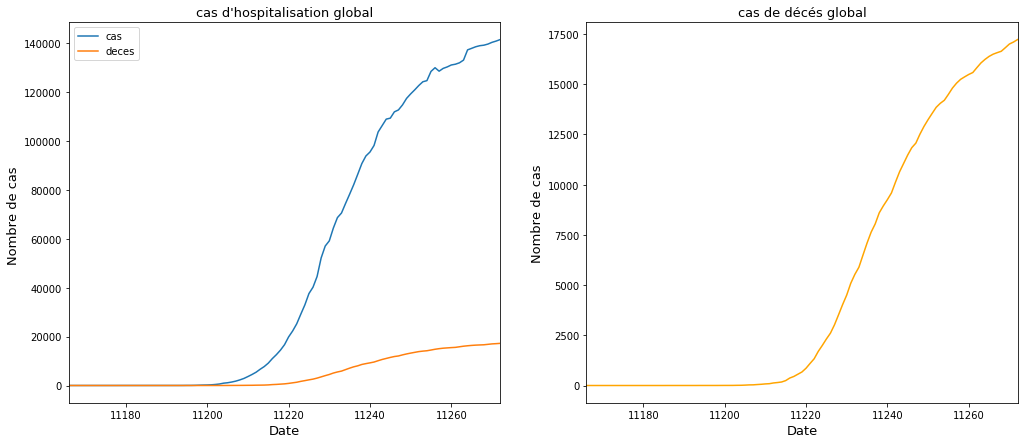

In [4]:
totalConfirme = data["cas"].to_frame()
totalDC = data["deces"]
totale = totalConfirme.join(totalDC)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
totale.plot(ax=ax1)
ax1.set_title("cas d'hospitalisation global", size=13)
ax1.set_ylabel("Nombre de cas ", size=13)
ax1.set_xlabel("Date", size=13)
totalDC.plot(ax=ax2, color='orange')
ax2.set_title("cas de décés global", size=13)
ax2.set_ylabel("Nombre de cas", size=13)
ax2.set_xlabel("Date", size=13)

## Modèle SIR
- Classe SIRModel :
    - Instanciation : à partir des 
    - Fit : 
    - Predict : 

## Simulation

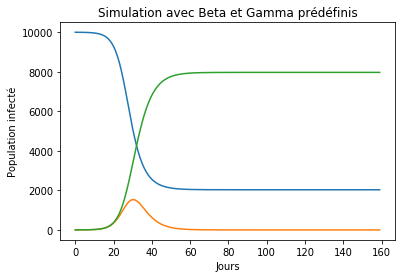

parameters: beta = 0.6  and gamma =  0.3


In [5]:
expectedBeta = 0.6
expectedGama = 3./10

N=10000

x = [i for i in range (0,160)]

a = SIRModel(N=N,I0=1,R0=0,beta_init=expectedBeta,gamma_init=expectedGama)

S,I,R = a.predict(x)

plt.plot(x, S)
plt.plot(x, I)
plt.plot(x, R)
plt.title("Simulation avec Beta et Gamma prédéfinis")
plt.ylabel("Population infecté")
plt.xlabel("Jours")
plt.show()
print("parameters: beta =", a.beta, " and gamma = ", a.gamma)

## Fit du SIR model sur des données synthétiques

Text(0.5, 0, 'Jours')

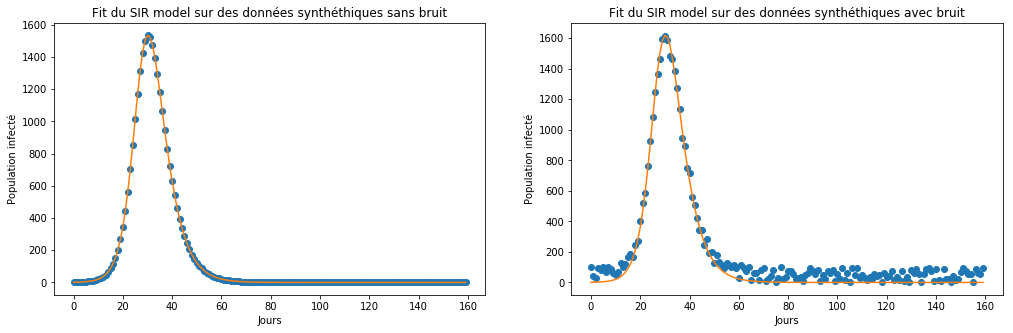

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,5))

expectedBeta = 0.6
expectedGama = 3./10

infected = I

N=10000

x = [i for i in range (0,160)]
y = infected # infection géneré par le modéle précedent d'exemple 

a = SIRModel(N=N,I0=infected[0])

a.fit(x,y)

ax1.plot(x, y, 'o')
ax1.plot(x, a.predict(x)[1])
ax1.set_title("Fit du SIR model sur des données synthéthiques sans bruit")
ax1.set_ylabel("Population infecté")
ax1.set_xlabel("Jours")

infected = I + np.random.randint(100,size=160)
y = infected # infection géneré par le modéle précedent d'exemple 

a = SIRModel(N=N,I0=1)

a.fit(x,y)

ax2.plot(x, y, 'o')
ax2.plot(x, a.predict(x)[1])
ax2.set_title("Fit du SIR model sur des données synthéthiques avec bruit")
ax2.set_ylabel("Population infecté")
ax2.set_xlabel("Jours")

## Fit du SIR model sur les données réelles

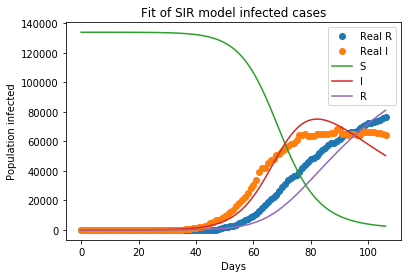

parameters: beta = 0.1811655266646416  and gamma =  0.02763385081087929


In [9]:
infected = data["cas"]  - data["guerisons"]  - data["deces"]
infected = list(infected)

x = [i for i in range (0,len(infected))]
y = infected 

a = SIRModel(N=data_N,I0=infected[0])

a.fit(x,y)

plt.plot(x, data["deces"] + data["guerisons"], 'o', label="Real R")
plt.plot(x, y, 'o', label="Real I")
plt.plot(x, a.predict(x)[0], label="S")
plt.plot(x, a.predict(x)[1], label="I")
plt.plot(x, a.predict(x)[2], label="R")
plt.legend()
plt.title("Fit of SIR model infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("parameters: beta =", a.beta, " and gamma = ", a.gamma)

## Fit du SEIRD model sur les données réelles

3.0


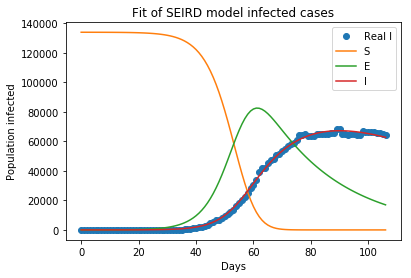

alpha = -40.39816840441318 beta = 1.1115332119579673 gamma = 0.9886266506832222 delta = 0.038499665348961716 rho = 1.0126518377751197


In [8]:
infected = data["cas"]  - data["guerisons"]  - data["deces"]
infected = list(infected)

x = [i for i in range (0,len(infected))]
y = infected

a = SEIRDModel(N=data_N,I0=infected[0], E0=0)

a.fit(x,y)

print(infected[0])

plt.plot(x, y, 'o', label="Real I")
#plt.plot(x, data["deces"], 'o')
plt.plot(x, a.predict(x)[0], label="S")
plt.plot(x, a.predict(x)[1], label="E")
plt.plot(x, a.predict(x)[2], label="I")
plt.legend()
plt.title("Fit of SEIRD model infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("alpha =", a.alpha, "beta =", a.beta, "gamma =", a.gamma, "delta =", a.delta, "rho =", a.rho)